<a href="https://colab.research.google.com/github/edwardoughton/GeoAI/blob/main/03_01_ggs590_geoai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🗺️ Week 3 GeoAI: Code generation for GeoAI workflows 🗺️

GeoAI, like all ML/AI topics, is data-driven. That means you need to be able to readily access data, manipulate it, and begin working to answer a question/hypothesis.

Today we will look at how you use AI-tools to generate and validate code to answer a spatial problem.

We will cover:

* Getting data
* Visualizing/manipulating data
* Carrying out spatial processing
* Validating we have sensible results


# Working with OpenStreetMap data

[OpenStreetMap (OSM)](https://openstreetmap.org) is an open-source geographic database that provides detailed information about roads, buildings, land use, rail lines, ports, Points of Interest (PoIs) and many other spatial features worldwide. OSM is openly licensed data meaning we can readily access and utilize this amazing data source for spatial analysis.

Today we will access OSM data via the Python library package `OSMnx`, which provides an interface for downloading this information as geospatial objects and network graphs. The motivation for using `OSMnx` is that it simplifies the process of retrieving spatial features within defined geographic boundaries. We can construct street networks as graph structures suitable for routing and network analysis, as well as download tagged features (buildings etc.) as `GeoPandas` GeoDataFrames, compatible with the broader Python geospatial ecosystem.

Hence, we can then get working with some of the packages we have already been looking at to work with spatial data (`GeoPandas`, `Shapely`, and `Matplotlib`, etc.).

We will now cover some basic examples for accessing data. You can read the [OSMnx documentation](https://osmnx.readthedocs.io/en/stable/user-reference.html) for further details on specific functions and other capabilities.

In [ ]:
# Load external packages not available in Python or Colab
!pip install osmnx contextily

# And then import the packages we need
import osmnx as ox
import shapely.geometry as sg # This package handles spatial geometries
import matplotlib.pyplot as plt
import contextily as ctx # This package allows us to add background maps

In [87]:
# Let us specify a geometry of interest to get data for
#!pip install osmnx contextily
import osmnx as ox
import shapely.geometry as sg
import matplotlib.pyplot as plt
import contextily as ctx

# Estimated bounding box polygon for GMU campus, Fairfax, Virginia
bbox_poly = sg.box(minx=-77.32, miny=38.82, maxx=-77.29, maxy=38.84)

# This will be a shapely object "POLYGON ((-77.29 38.82, ...))"
print(bbox_poly)

POLYGON ((-77.29 38.82, -77.29 38.84, -77.32 38.84, -77.32 38.82, -77.29 38.82))


In [94]:
# Now we can give this bbox to OSMnx and request all buildings
#!pip install osmnx contextily
import osmnx as ox
import shapely.geometry as sg
import matplotlib.pyplot as plt
import contextily as ctx

bbox_poly = sg.box(minx=-77.32, miny=38.82, maxx=-77.29, maxy=38.84)

tags = {"building": True}
data = ox.features_from_polygon(bbox_poly, tags)
data.head(n=3)

geometry  \
element  id                                                               
node     11378598552                         POINT (-77.30717 38.83158)   
relation 7476032      POLYGON ((-77.3105 38.8376, -77.31075 38.83748...   
         7681886      POLYGON ((-77.30323 38.83461, -77.30306 38.834...   

                     amenity     building                name addr:city  \
element  id                                                               
node     11378598552    cafe          yes            argo tea       NaN   
relation 7476032         NaN  residential                 NaN       NaN   
         7681886         NaN          yes  Green Acres Center   Fairfax   

                     addr:county addr:housenumber addr:state    addr:street  \
element  id                                                                   
node     11378598552         NaN              NaN        NaN            NaN   
relation 7476032             NaN              NaN        NaN            NaN   
         7681886             NaN             4401         VA  Sideburn Road   

                     addr:unit  ... takeaway shelter_type wheelchair foot  \
element  id                     ...                                         
node     11378598552       NaN  ...      NaN          NaN        NaN  NaN   
relation 7476032           NaN  ...      NaN          NaN        NaN  NaN   
         7681886           NaN  ...      NaN          NaN        NaN  NaN   

                     surface access toilets:disposal unisex          type  \
element  id                                                                 
node     11378598552     NaN    NaN              NaN    NaN           NaN   
relation 7476032         NaN    NaN              NaN    NaN  multipolygon   
         7681886         NaN    NaN              NaN    NaN  multipolygon   

                                              old_name  
element  id                                             
node     11378598552                               NaN  
relation 7476032      Commonwealth Nursing Care Center  
         7681886                                   NaN  

[3 rows x 68 columns]

In [95]:
# Let us create a map of this data
# We will need to convert to EPSG:3857 for use with web tiles
#!pip install osmnx contextily
import osmnx as ox
import shapely.geometry as sg
import matplotlib.pyplot as plt
import contextily as ctx

bbox_poly = sg.box(minx=-77.32, miny=38.82, maxx=-77.29, maxy=38.84)

tags = {"building": True}
data = ox.features_from_polygon(bbox_poly, tags)

# Project to EPSG:3857 for web tiles
data_3857 = data.to_crs(epsg=3857)
data_3857.head(n=3)

geometry  \
element  id                                                               
node     11378598552                   POINT (-8605794.476 4697574.928)   
relation 7476032      POLYGON ((-8606165.448 4698435.905, -8606193.4...   
         7681886      POLYGON ((-8605356.2 4698008.301, -8605337.209...   

                     amenity     building                name addr:city  \
element  id                                                               
node     11378598552    cafe          yes            argo tea       NaN   
relation 7476032         NaN  residential                 NaN       NaN   
         7681886         NaN          yes  Green Acres Center   Fairfax   

                     addr:county addr:housenumber addr:state    addr:street  \
element  id                                                                   
node     11378598552         NaN              NaN        NaN            NaN   
relation 7476032             NaN              NaN        NaN            NaN   
         7681886             NaN             4401         VA  Sideburn Road   

                     addr:unit  ... takeaway shelter_type wheelchair foot  \
element  id                     ...                                         
node     11378598552       NaN  ...      NaN          NaN        NaN  NaN   
relation 7476032           NaN  ...      NaN          NaN        NaN  NaN   
         7681886           NaN  ...      NaN          NaN        NaN  NaN   

                     surface access toilets:disposal unisex          type  \
element  id                                                                 
node     11378598552     NaN    NaN              NaN    NaN           NaN   
relation 7476032         NaN    NaN              NaN    NaN  multipolygon   
         7681886         NaN    NaN              NaN    NaN  multipolygon   

                                              old_name  
element  id                                             
node     11378598552                               NaN  
relation 7476032      Commonwealth Nursing Care Center  
         7681886                                   NaN  

[3 rows x 68 columns]

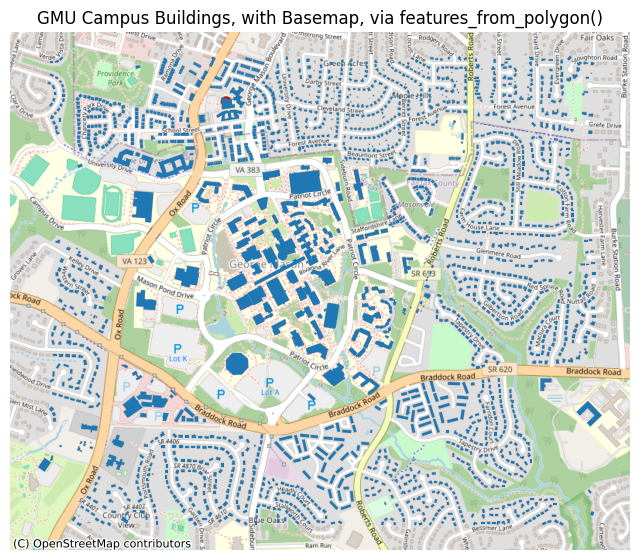

In [101]:
# Let us create a map of this data
# We will need to convert to EPSG:3857 for use with contextily
#!pip install osmnx contextily
import osmnx as ox
import shapely.geometry as sg
import matplotlib.pyplot as plt
import contextily as ctx

bbox_poly = sg.box(minx=-77.32, miny=38.82, maxx=-77.29, maxy=38.84)

tags = {"building": True}
data = ox.features_from_polygon(bbox_poly, tags)

data_3857 = data.to_crs(epsg=3857)

# Now we can use matplotlib (covered last week)
fig, ax = plt.subplots(figsize=(8, 8)) # Create figure/axes
data_3857.plot(ax=ax, linewidth=1) # Plot geometries
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik) # Add base map
ax.set_axis_off() # Clean axes
ax.set_title("GMU Campus Buildings, with Basemap, via features_from_polygon()") # Add title
plt.show() # Show map

There are a range of other functions we can utilize from `OSMnx`.

If you want the actual network graph, you can utilize `graph_from_polygon()` as follows:

MultiDiGraph with 299 nodes and 661 edges


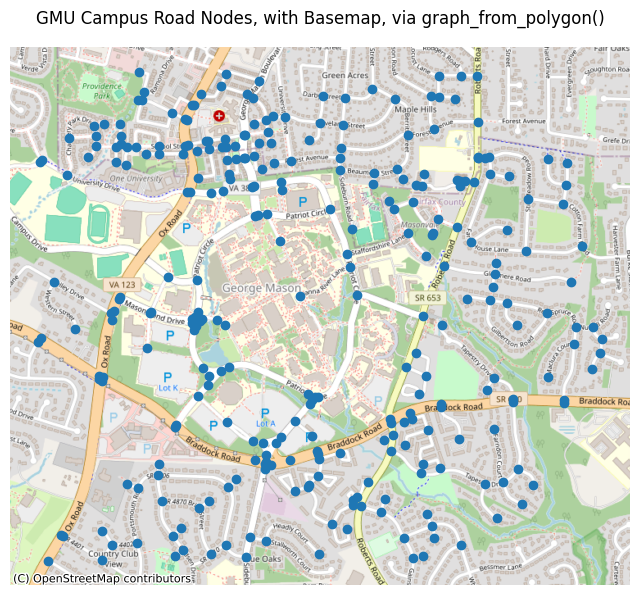

In [103]:
#!pip install osmnx contextily
import osmnx as ox
import shapely.geometry as sg
import matplotlib.pyplot as plt
import contextily as ctx

bbox_poly = sg.box(minx=-77.32, miny=38.82, maxx=-77.29, maxy=38.84)

# This time we use graph_from_polygon()
G = ox.graph_from_polygon(bbox_poly, network_type="drive")
print(G)

# Separate out the graph nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

nodes_3857 = nodes.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 8))
nodes_3857.plot(ax=ax, linewidth=1)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.set_title("GMU Campus Road Nodes, with Basemap, via graph_from_polygon()")
plt.show()

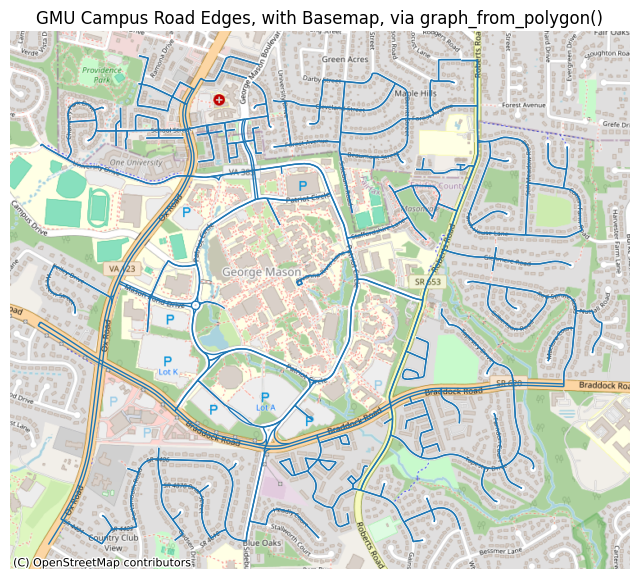

In [104]:
#!pip install osmnx contextily
import osmnx as ox
import shapely.geometry as sg
import matplotlib.pyplot as plt
import contextily as ctx

bbox_poly = sg.box(minx=-77.32, miny=38.82, maxx=-77.29, maxy=38.84)

# This time we use graph_from_polygon()
G = ox.graph_from_polygon(bbox_poly, network_type="drive")

# Separate out the graph nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

edges_3857 = edges.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 8))
edges_3857.plot(ax=ax, linewidth=1)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.set_title("GMU Campus Road Edges, with Basemap, via graph_from_polygon()")
plt.show()


`OSMnx` also allows us to use the `graph_from_place()` function, so you can just state a city/county, state, and country ID.

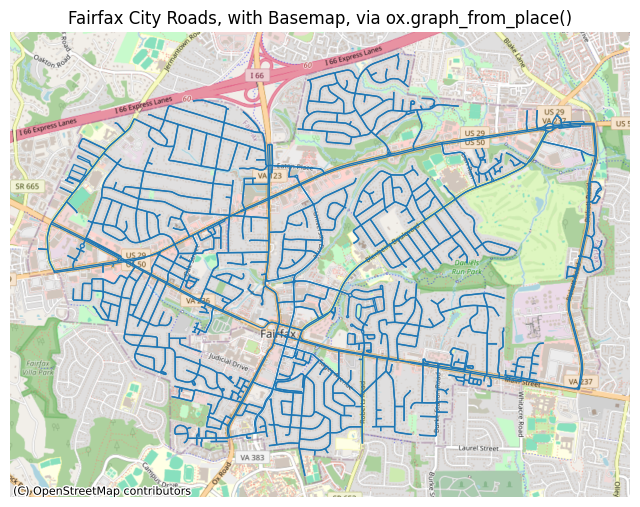

In [105]:
#!pip install osmnx contextily
import osmnx as ox
import shapely.geometry as sg
import matplotlib.pyplot as plt
import contextily as ctx

bbox_poly = sg.box(minx=-77.32, miny=38.82, maxx=-77.29, maxy=38.84)

# Use graph_from_place() function
G = ox.graph_from_place("Fairfax, Virginia, USA", network_type="drive")

# And then use graph_to_gdfs() to get a GeoPandas GeoDataFrame
roads = ox.graph_to_gdfs(G, nodes=False)

roads_3857 = roads.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 8))
roads_3857.plot(ax=ax, linewidth=1)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.set_title("Fairfax City Roads, with Basemap, via graph_from_place()")
plt.show()


# Exercise

Now you can have a go yourself at generating this code, for a Generative AI tool and problem, of your choosing.

You need to specify in natural language what you want to do, and then try and get the code working that is provided. Please think critically about this exercise, and document any errors to raise with the class.

We will then run through an example together and discuss any problems/issues you encountered.

# Are buildings clustered near major roads in Northern Virginia?

Now we run through a problem together, to introduce you to code-based analytical techniques, and some basic validation.  

First, we can define our spatial object classes as follows:

* For major roads, we can get OSM road segments with `"highway": ["motorway", "trunk", "primary", "motorway_link", "trunk_link", "primary_link"]`.
* For buildings we can get OSM features with tag `building=True`.

Secondly, we can operationalize the concept. So, for the statement “clustered near major roads” we can explore buildings occurring within some set distances of roads. Here we can use buffering and spatial intersections to obtain the share of buildings within some distance.

Let us first set up an Area of Interest (AoI) using `geocode_to_gdf()`.

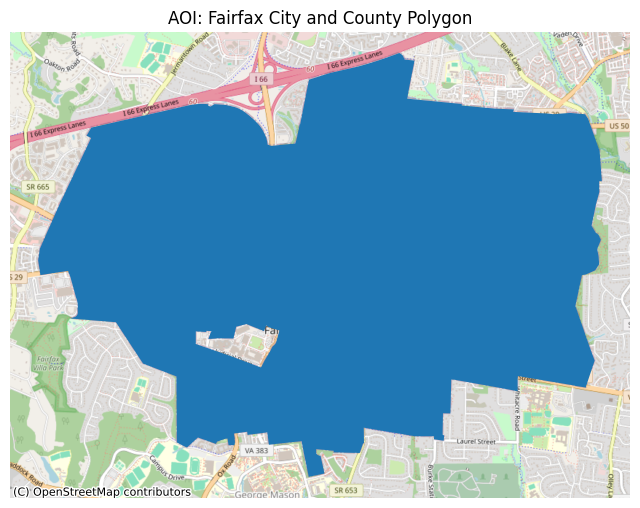

In [108]:
# !pip -q install osmnx geopandas shapely pyproj rtree
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as sg
import matplotlib.pyplot as plt

ox.settings.use_cache = True # Turn on local request caching
ox.settings.log_console = True # Turn on console logging to save

places = [
    {"city": "Fairfax", "state": "Virginia", "country": "USA"},
    # {"county": "Fairfax County", "state": "Virginia", "country": "USA"}
]
aoi = ox.geocode_to_gdf(places)  # returns a GeoDataFrame polygon

aoi = aoi.to_crs(epsg=3857) # Project to EPSG:3857 for web tiles
fig, ax = plt.subplots(figsize=(8, 8)) # Plot
aoi.plot(ax=ax, linewidth=1)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.set_title("AOI: Fairfax City Polygon")
plt.show()

We will use dictionaries in this example, so let us quickly recap on their structure.

In [113]:
# Dictionary data structure example
my_dict = {'key0': 'value0', 'key1': 'value1', 'key2': 'value2'}

# Print items (keys and values)
print(my_dict.items())

# Print keys
print(my_dict.keys())

# Print values
print(my_dict.values())

# Loop over keys and values
for key, value in my_dict.items():
  print(key, value)

dict_items([('key0', 'value0'), ('key1', 'value1'), ('key2', 'value2')])
dict_keys(['key0', 'key1', 'key2'])
dict_values(['value0', 'value1', 'value2'])
key0 value0
key1 value1
key2 value2


Next, we can get our road data and visualize it (to check it is valid).

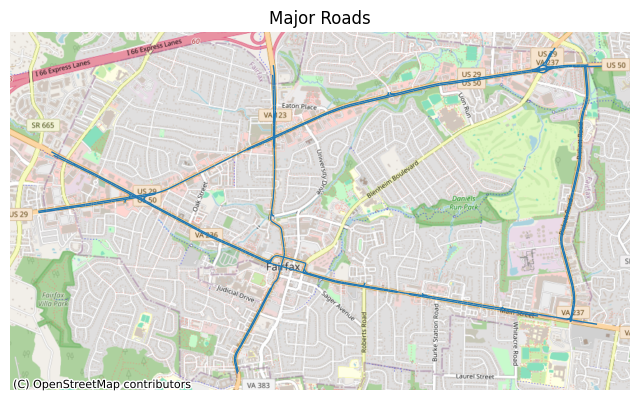

In [119]:
# !pip -q install osmnx geopandas shapely pyproj rtree
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as sg
import matplotlib.pyplot as plt

ox.settings.use_cache = True
ox.settings.log_console = True

places = [
    {"city": "Fairfax", "state": "Virginia", "country": "USA"},
    # {"county": "Fairfax County", "state": "Virginia", "country": "USA"}
]
aoi = ox.geocode_to_gdf(places)  # returns a GeoDataFrame polygon
aoi = aoi.to_crs(epsg=4326)

# AoI is a Pandas GeoDataFrame. Get the geometry object.
poly = aoi.geometry.iloc[0]

# Specify tags for 'major roads'
road_tags = {"highway": ["motorway", "trunk", "primary", "motorway_link", "trunk_link", "primary_link"]}

# Get roads for the polygon we are working with
roads = ox.features_from_polygon(poly, tags=road_tags)

# Map results
roads = roads.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(8, 8))
roads.plot(ax=ax, linewidth=1)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.set_title("Major Roads")
plt.show()

Having got our road data in place, now we need buildings, which we can also download from OSMnx.

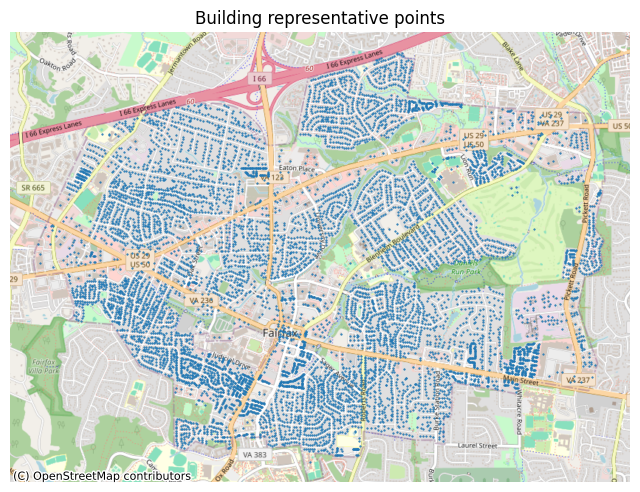

In [124]:
# !pip -q install osmnx geopandas shapely pyproj rtree
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as sg
import matplotlib.pyplot as plt

ox.settings.use_cache = True
ox.settings.log_console = True

places = [
    {"city": "Fairfax", "state": "Virginia", "country": "USA"},
    # {"county": "Fairfax County", "state": "Virginia", "country": "USA"}
]
aoi = ox.geocode_to_gdf(places)  # returns a GeoDataFrame polygon
aoi = aoi.to_crs(epsg=4326)

poly = aoi.geometry.iloc[0]
road_tags = {"highway": ["motorway", "trunk", "primary", "motorway_link", "trunk_link", "primary_link"]}
roads = ox.features_from_polygon(poly, tags=road_tags)

# Get buildings from OSMnx
buildings = ox.features_from_polygon(poly, tags={"building": True})

# Convert all geometries to interior representative points
buildings["geometry"] = buildings.geometry.representative_point()

# Map results
buildings = buildings.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(8, 8))
buildings.plot(ax=ax, markersize=.3)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
ax.set_title("Building representative points")
plt.show()

# Exercise

Can you see any advantages and disadvantages with our building data?

Write a quick summary, and then we can have a class discussion.


As we will be doing measurement work, it is appropriate to change our data layers into a suitable CRS.

In [139]:
# Convert to a projected CRS for measurements
# !pip -q install osmnx geopandas shapely pyproj rtree
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as sg
import matplotlib.pyplot as plt

ox.settings.use_cache = True
ox.settings.log_console = True

places = [
    {"city": "Fairfax", "state": "Virginia", "country": "USA"},
    # {"county": "Fairfax County", "state": "Virginia", "country": "USA"}
]
aoi = ox.geocode_to_gdf(places)  # returns a GeoDataFrame polygon
aoi = aoi.to_crs(epsg=4326)

poly = aoi.geometry.iloc[0]

road_tags = {"highway": ["motorway", "trunk", "primary", "motorway_link", "trunk_link", "primary_link"]}
roads = ox.features_from_polygon(poly, tags=road_tags)
roads = roads[['geometry']]

buildings = ox.features_from_polygon(poly, tags={"building": True})
buildings["geometry"] = buildings.geometry.representative_point()
buildings = buildings[['geometry']]

# Convert to a projected CRS for measurements
# Virginia Lambert - EPSG:6591, projected in meters
aoi_p = aoi.to_crs(epsg=6591)
roads_p = roads.to_crs(epsg=6591)
buildings_p = buildings.to_crs(epsg=6591)

That should all be reasonably straight forward, as we have already covered how to get data from OSMnx, and then visualize it in maps, and to convert the CRS.

Now we need to use some new functions.  

We will make all roads a single geometry object by creating a union (rather than having them as a GeoPandas GeoDataFrame).

                                                          geometry
element id                                                        
way     6028604  LINESTRING (190263.216 319650.67, 190264.895 3...
450
MULTILINESTRING ((190263.2164901219 319650.669958825, 190264.895140272 319689.3571513413, 190265.13565629272 319695.32483381423, 190265.27101896473 319700.23529748525, 190265.4471071875 319708.9215386137, 190265.64392986495 319722.9596230623), (190265.64392986495 319722.9596230623, 190265.69859008052 319726.5136831056, 190265.21631001358 319746.49765788164), (188287.4636703876 319089.07685520145, 188333.82769977444 319068.04846722155, 188351.4872319686 319059.8140205996, 188375.4840109745 319048.61964596645, 188403.49516194136 319035.4212024269), (190620.88419628 318176.5544949285, 190609.45870043195 318179.8360277104, 190580.48464945948 318188.6852300601), (190269.98054250667 318223.31087567087, 190262.25225576246 318214.56785694166, 190257.71351259644 318209.3532430303, 190253.20657

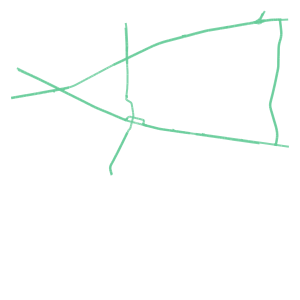

In [150]:
# Dissolve roads to reduce geometry count (more efficient for intersections)
print(roads_p.head(1))
print(len(roads_p))
roads_union = roads_p.union_all()
print(roads_union) # Now it's a shapely geometry object
roads_union

And, we can add a buffer to our road. Let us start with 250m and view it.

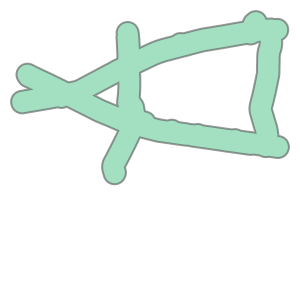

In [141]:
# Add road buffer of 250m, make linestrings into polygons
buf = sg.base.BaseGeometry.buffer(roads_union, 250)
buf

Next, we will intersect this buffer with the buildings, using the sjoin() function.


In [143]:
# Intersect buildings and the buffered road geometry

# Convert buffer to GeoPandas GeoDataFrame to use sjoin function (intersection)
buf_gdf = gpd.GeoDataFrame(geometry=[buf], crs=roads_p.crs)

# Carry out spatial join using sjoin() function (intersection)
join = gpd.sjoin(buildings_p, buf_gdf, predicate="within", how="left")
print(join.head(3))
near = ~join["index_right"].isna() # Will be True where spatial match exists
print(near.head(3))

                                          geometry  index_right
element id                                                     
node    1837195623   POINT (192958.211 320187.134)          0.0
        11787202434  POINT (189432.682 319082.863)          0.0
        11787226557  POINT (188242.954 318662.582)          0.0
element  id         
node     1837195623     True
         11787202434    True
         11787226557    True
Name: index_right, dtype: bool




Next is more complicated though. We are going to set multiple buffer distances for roads, and loop over them to calculate the share of buildings intersecting, using the code we just covered.

You should already be reasonably familiar with how to loop over a list, but here is a refresh, for example:

In [125]:
# Looping over a list
my_list = [0,1,2]
for i in my_list:
  print(i)

0
1
2


This for loop structure always begins with the term `for`, and then after that we specify the iterator, which here we will treat as `i`.

Next, Python syntax requires we first say `in`, before then stating our data structure (which is our list, so `my_list`).

At each iteration (e.g., during the loop), the iterator `i` will take on each value in the list.

Thus, the first iteration will see `i` be 0, and for the second iteration `i` will be 1, and so on (hence, reflecting the list contents of 0,1,2).


In [148]:
# Creating a list of dictionaries
my_list_input = [0,1,2]

my_list_output = []
for i in my_list_input:

  my_list_output.append({   # Append a dictionary we create to our output list
      f'key{i}': f'key{i}', # Remember, these are just fstrings with i inserted
  })

print(my_list_output)
print(' ')
print(pd.DataFrame(my_list_output)) # We can also create a Pandas DataFrame

[{'key0': 'key0'}, {'key1': 'key1'}, {'key2': 'key2'}]
 
   key0  key1  key2
0  key0   NaN   NaN
1   NaN  key1   NaN
2   NaN   NaN  key2


We can put all of this together in a for loop as follows (see cell below for code):

* convert to a single geometry for our roads
* set our distances list
* create an empty list for our output data
* specify our for loop (e.g., the iterator and the data structure)
* buffer the road by the desired distance
* convert to a Geopandas GeoDataFrame
* spatially intersect the buffered road and buildings
* set intersecting buildings to True in the spatial index we created
* create a dictionary for each iteration, and append to our output list
* finally, we create a Pandas DataFrame from the list of dictionaries

In [79]:
# Calculate intersections

# Union all road linestrings into a single geometry object
roads_union = roads_p.union_all()

# Calculate our distances
distances_m = [250, 500, 750, 1000]

rows = []
for d in distances_m:
    print(f"Working on: {d}") # Print text label to the console
    buf = sg.base.BaseGeometry.buffer(roads_union, d)  # Buffer union
    buf_gdf = gpd.GeoDataFrame(geometry=[buf], crs=roads_p.crs) # Make gpd
    join = gpd.sjoin(buildings_p, buf_gdf, predicate="within", how="left") #spatial join
    near = ~join["index_right"].isna() #

    rows.append({
        "distance_m": d,
        "n_buildings": len(buildings_p),
        "n_near": int(near.sum()),
        "share_near": float(near.mean())
    })

pd.DataFrame(rows)

Working on: 250
Working on: 500
Working on: 750
Working on: 1000


distance_m  n_buildings  n_near  share_near
0         250         8566    3135    0.365982
1         500         8566    5928    0.692038
2         750         8566    7673    0.895751
3        1000         8566    8398    0.980388

# Exercise

Have a think about how you would interpret this data (e.g., each column), including any issues there might be.
Write down your notes so you can contribute to a class discussion.

In [77]:
# Revise the code to include a density value

roads_union = roads_p.union_all()

distances_m = [250, 500, 750, 1000]

rows = []
for d in distances_m:
    print(f"Working on: {d}")
    buf = sg.base.BaseGeometry.buffer(roads_union, d)
    buf_gdf = gpd.GeoDataFrame(geometry=[buf], crs=roads_p.crs)
    buf_area_km2 = (buf_gdf.geometry.area / 1e6).sum() # Get the buffer area
    join = gpd.sjoin(buildings_p, buf_gdf, predicate="within", how="left")
    near = ~join["index_right"].isna()

    rows.append({
        "distance_m": d,
        "n_buildings": len(buildings_p),
        "n_near": int(near.sum()),
        "share_near": float(near.mean()),
        "density_km2": int(near.sum()) / buf_area_km2 # Export building density
    })

pd.DataFrame(rows)

Working on: 250
Working on: 500
Working on: 750
Working on: 1000


distance_m  n_buildings  n_near  share_near  density_km2
0         250         8566    3134    0.365865   358.063209
1         500         8566    5926    0.691805   368.558375
2         750         8566    7672    0.895634   333.794907
3        1000         8566    8398    0.980388   283.009904

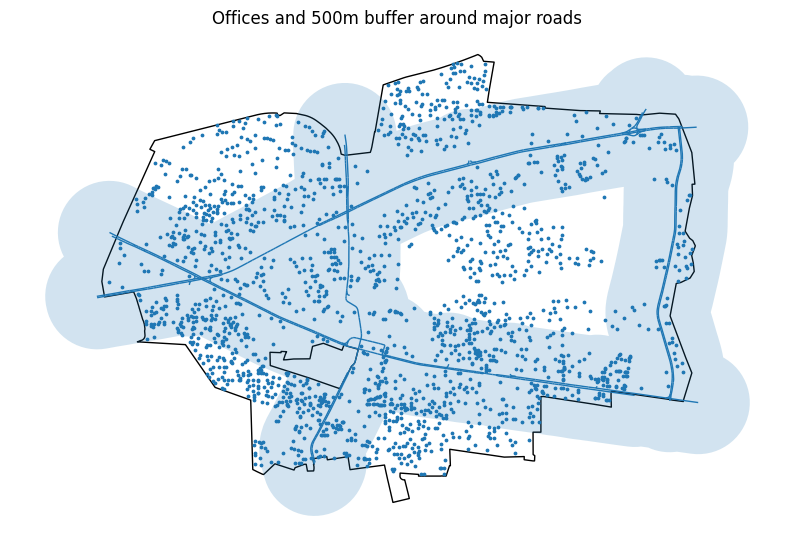

In [83]:
# Visualize
d = 500
buf = roads_union.buffer(d)
buf_gdf = gpd.GeoDataFrame(geometry=[buf], crs=roads_p.crs)

fig, ax = plt.subplots(figsize=(10, 10))
aoi_p.plot(ax=ax, facecolor="none", edgecolor="black")
gpd.GeoSeries(roads_union, crs=roads_p.crs).plot(ax=ax, linewidth=1)
buf_gdf.plot(ax=ax, alpha=0.2)
buildings_p.sample(min(2000, len(buildings_p)), random_state=7).plot(ax=ax, markersize=3)
ax.set_title(f"Offices and {d}m buffer around major roads")
ax.set_axis_off()
plt.show()


# Exercise

* Try create maps for two other distances.
* Color the building points in the buffered road polygon red, and those outside yellow, for all maps.
* How might you further validate the results?

# Exercise

Using a Generative AI tool of your choice, specify in natural language this problem.

See if you can recreate code for the City of Alexandria, VA.  